<a href="https://colab.research.google.com/github/harrypotterplan/goodlight/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

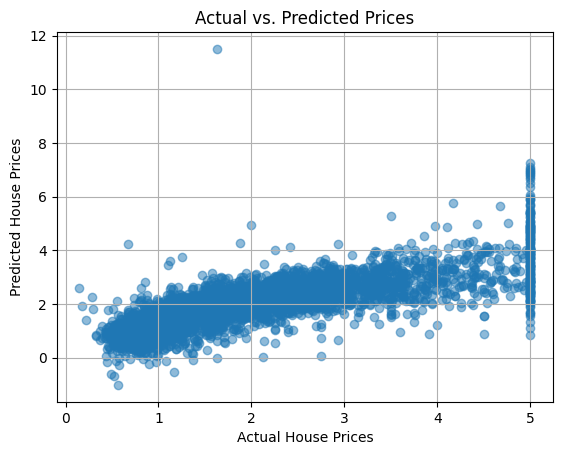

In [1]:
# 1. 필요한 라이브러리 불러오기
# 데이터 전처리와 선형 회귀를 위한 패키지들을 불러온다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing#캘리포니아 집값을 불러오는 함수.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score#모델의 정확성을 평가하기 위한 도구

# 2. 데이터셋 불러오기
# 캘리포니아 주택 가격 데이터를 불러온다.
housing = fetch_california_housing()

# 3. 데이터셋 설명 확인
print(housing.DESCR)

# 4. DataFrame으로 변환하여 데이터 미리보기
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df['Target'] = housing['target']
df.head()

# 5. 독립 변수(X), 종속 변수(y) 설정
# X에는 집의 특성들을, y에는 집값을 넣는다.
X = housing['data']
y = housing['target']

# 6. 학습용, 테스트용 데이터로 분리
# 데이터를 80% 학습용, 20% 테스트용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 선형 회귀 모델 학습
# 모델을 생성하고 학습시킨다.
model = LinearRegression()
model.fit(X_train, y_train)

# 8. 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 9. 모델 평가
# 예측 성능을 평가하기 위해 MSE와 R² 점수를 계산한다.
mse = mean_squared_error(y_test, y_pred) #평균제곱오차 예측이 실제 값과 얼마나 차이 나는지를 제곱해서 평균을 낸 값. 값이 작을수록 좋음.
r2 = r2_score(y_test, y_pred) #0에서 1 사이의 값을 가지며, 1에 가까울수록 좋은 모델. 예측값이 실제값의 변동을 얼마나 잘 설명하는지 나타내는 척도이다.

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# 10. 회귀 계수와 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 11. 예측 결과 시각화 (옵션)
plt.scatter(y_test, y_pred, alpha=0.5)#알파는 그래프의 투명도를 나타낸 파라미터이다. (그래프를 보기 좋게 해준다.)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()
